In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/iris.csv")

# Predict Petal.Width based on the given dataset

In [5]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Unnamed: 0      150 non-null int64
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df = df.drop(labels="Unnamed: 0", axis=1) #axis zero is for rows

In [9]:
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


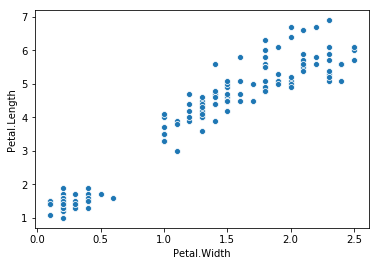

In [12]:
sb.scatterplot(df['Petal.Width'], df['Petal.Length'])

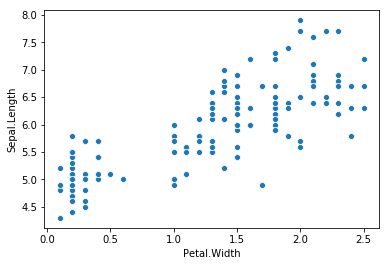

In [13]:
sb.scatterplot(df['Petal.Width'], df['Sepal.Length'])

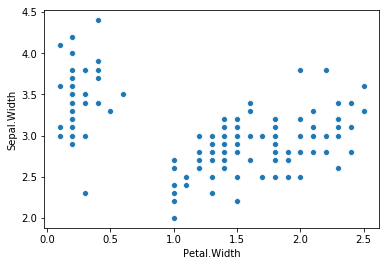

In [14]:
sb.scatterplot(df['Petal.Width'], df['Sepal.Width'])

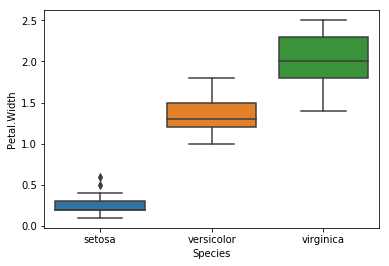

In [15]:
sb.boxplot(df.Species, df['Petal.Width']) # for plotting categorical and quantitative values, we use boxplot

OLS requires all continuous features. But, Species here is categorical.
We will use One Hot Encoding for converting this dataset into completely quantitative dataset.
But, we can use One Hot Encoding for a low cardinality category only.

In [36]:
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/iris.csv")
# df = df.drop(labels="")
# pd.get_dummies(df.Species) # to get new one hot encoded features
df = df.join(pd.get_dummies(df.Species))
df.head()
# X = df[['Petal.Length', 'Sepal.Width', 'Sepal.Length', 'setosa', 'versicolor', 'virginica']]  # First OLS model
X = df[['Petal.Length', 'Sepal.Width', 'setosa', 'versicolor', 'virginica']] # Second OLS model
# X = df[['Petal.Length', 'Sepal.Width', 'setosa', 'virginica']] # Third OLS model ... But, v can't do this... Versicolor corresponds to a category and is 1/3rd of the data
y = df[['Petal.Width']]

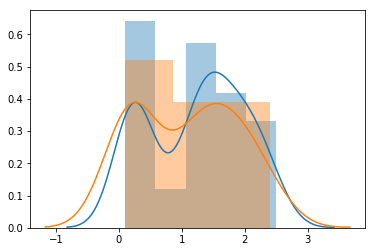

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
sb.distplot(y_train)
sb.distplot(y_test)

# OLS

In [38]:
from statsmodels.api import OLS, add_constant
xconst = add_constant(X_train)
model = OLS(y_train, xconst)
est = model.fit()
est.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Petal.Width   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     564.4
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           1.44e-74
Time:                        09:35:41   Log-Likelihood:                 45.471
No. Observations:                 120   AIC:                            -80.94
Df Residuals:                     115   BIC:                            -67.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0357      0.124     -0.287      0.775      -0.282       0.211
Petal.Length     0.1717      0.039      4.407      0.000       0.095       0.249
Sepal.Width      0.1979      0.049      4.045      0.000       0.101       0.295
setosa          -0.6421      0.094     -6.855      0.000      -0.828      -0.457
versicolor       0.0786      0.057      1.385      0.169      -0.034       0.191
virginica        0.5279      0.101      5.229      0.000       0.328       0.728
==============================================================================
Omnibus:                        5.214   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                6.836
Skew:                          -0.160   Prob(JB):                       0.0328
Kurtosis:                       4.125   Cond. No.                     3.27e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: %.2f"%(mean_absolute_error(y_test, pred)))
print("MSE: %.2f"%(mean_squared_error(y_test, pred)))

MAE: 0.12
MSE: 0.03
